<a href="https://colab.research.google.com/github/chaidosa/100-days-of-DS/blob/main/Day_11_to_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 11

# Principal component analysis (PCA)
Goal: Develop a way to find a "compressed" representation of data. <br/>
<br/>
General steps for PCA <br/>
1. Data Preparation: This involves cleaning data, checking missing values, and normalizing or standardizing the variables if necessary.
<br/>
<br/>
2. Compute the Covariance Matrix: PCA works by finding the directions in which the data varies the most. To do this, we need to compute the covariance matrix, which represents the relationships between the variables in the dataset.
<br/>
<br/>
3. Compute the Eigenvectors and Eigenvalues: After computing the covaraince matrix, we need to find the eigenvectors and eigenvalues. The eigenvectors represent the directions of the data that vary the most, while the eigenvalues represent the amount of variance explained by each eigenvector.
<br/>
<br/>
4. Sort the Eigenvalues: Next, we sort the eigenvalues in descending order. This helps us identify the most important eigenvectors and decide how many principal components to retain.
<br/>
<br/>
5. Choose the Number of Principal Components: The number of principal components to retain depends on the amount of variance we want to explain. A common approach is to retain enough principal components to explain at least 70-80% of the total variance in the dataset.
<br/>
<br/>
6. Compute the Principal Components: We can now compute the principal components by multiplying the standardized data with the eigenvectors corresponding to the selected principal components.
<br/>
<br/>
7. Analyze the Results: Finally, we can analyze the results and interpret the principal components. The principal components can be used for data visualization, data compression, or as input for other machine learning algorithms.


## Sample Example

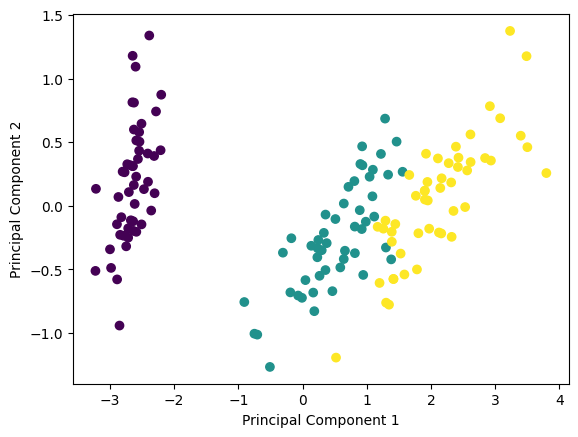

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Loading the iris dataset
d = load_iris()

# Creating a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the data
X_pca = pca.fit_transform(d.data)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=d.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In this example, we load the iris dataset, create a PCA object with 2 components, and fit the model to the data. We then transform the data into the 2-dimensional principal component space and plot the results using matplotlib. The resulting plot shows the data points projected onto the first two principal components, with different colors representing the three different classes of iris flowers. This can help us visualize how the data is distributed in the reduced dimensionality space.

#Day 12

# Clustering

Clustering is the process of grouping similar things based on their characteristics. For example, if we have a bunch of fruits, we can group them into clusters of apples, oranges, and bananas based on their color, size, and shape.
<br/>

In data science, clustering is used to find patterns within data that may not be immediately apparent. It involves grouping similar data points into clusters based on their attributes or characteristics. This can be useful for a wide range of applications, such as segmentation, image processing, etc.

<br/>
Today we'll explore the concept of clustering and how it can be applied in data science.


# Setup
Necessary libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs

#Generating Data

To show you how clustering algorithm works, we'll generate artificial/synthetic data using 'make_blobs' function from scikit-learn. This function creates a set of random points in space that are grouped togetther in clusters.

In [6]:
X, y = make_blobs(n_samples=100, centers=4, random_state=42)

We have created 100 points with 4 centers. Let's visualize how our datset looks like

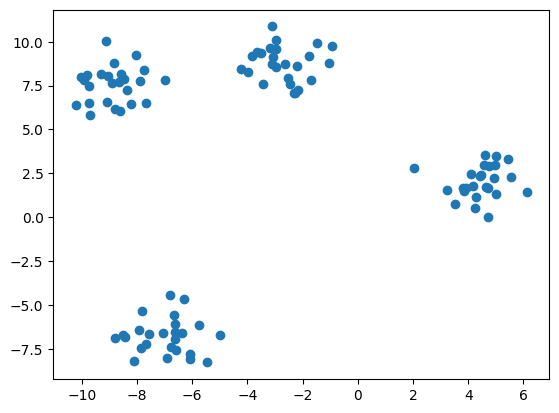

In [7]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

As we can see, the points are grouped into distinct clusters. Our goal or task is to automatically identify these clusters using clustering algorithms.

#### Now is the Time for our first algorithm


# K-Means Clustering

This algorithm is the most popular clustering algorithm due to its simplicity and effectiveness more specifically we're looking into Lloyd’s or Elkan’s algorithm [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) .

K-Means works by randomly selecting K points in the data (where K is the number of clusters we want to identify) and assigning each point in the data to the nearest cluster. It then updates the centroid of each cluster to be the mean of all the points assigned to that cluster, This process is repeated until the centroids no longer move.<br/>
<br/>
To implement K-Means in scikit-learn, we'll use the 'KMeans' class

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

We've initialized KMeans with 4 clusters and fit it to our data. Now we'll visualize the same

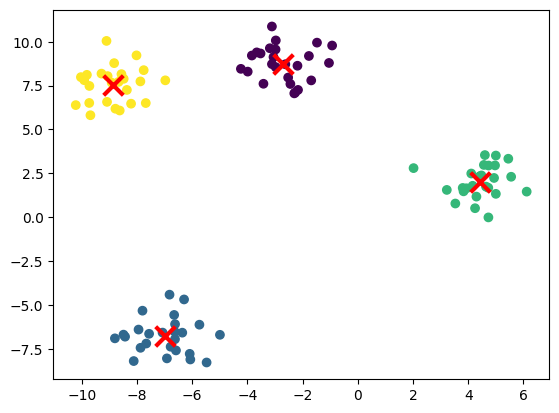

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

The colored points represent the clusters identified by K-Means, and the red X's represent the centroids of those clusters. As you can see, K-Means has done a good job of identifying the underlying clusters in our data.

#### Here, I have provided an overview of how things work in the KMeans algorithm. However, it is always important to delve into the nitty-gritty details. I encourage individuals to read the documentation for the code, and for more in-depth concepts, I would suggest reading materials topic-wise. If anyone would like me to include additional reading material, please do let me know.

# Hierarchical Clustering
<br/>
Another popular clustering algoritm is Hierarchical Clustering. This algorithm create a hierarchy of clusters by repeatedly merging the two closest clusters until all the points are in a single cluster. <br/>

 To implement Hierarchical Clustering in scikit-learn, we'll use the 'AgglomerativeClustering' class

In [10]:
hc = AgglomerativeClustering(n_clusters=4)
hc.fit(X)

AgglomerativeClustering(n_clusters=4)

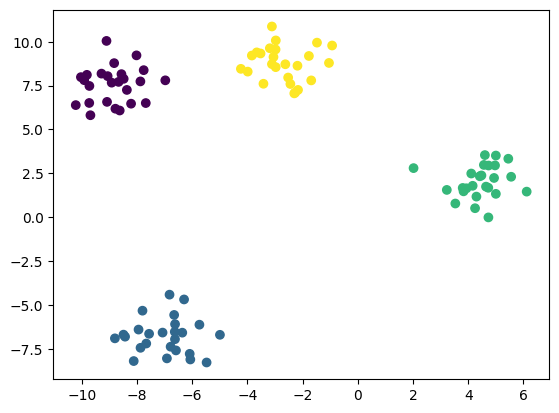

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=hc.labels_)
plt.show()

As one can see Agglomerative clustering has also done the good job

# Challangum (Choosing the number of Clusters)
<br/>
If you have followed carefully, you would have noticed that we chose 4 clusters (hyperparameters) because we knew that was how many clusters the data was generated with. However, the real world can be cruel :) and we may not have this information.
<br/>
<br/>
One way to determine the number of clusters is to use the elbow method. This involves plotting the within-cluster sum of squares (WCSS) as a function of the number of clusters and looking for the "elbow" point, where adding more clusters does not result in a significant decrease in WCSS. Don't worry, we will not be bending our arms for this method!

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

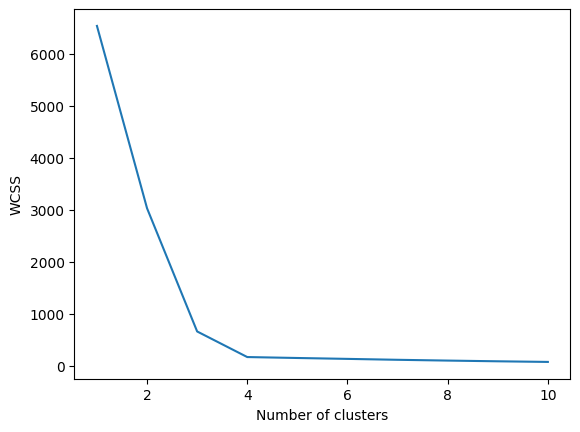

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In this case, we can see that the elbow point is at 4, which confirms that our choice of 4 clusters was appropriate.

# Conclusion
In this notebook, we've explored the concept of clustering in data science and implemented two popular clustering algorithms: K-Means and Hierarchical Clustering. We also looked at how to choose the number of clusters using the elbow method.

### PUN : Why did the data scientist go on a diet? To reduce his variance!